In [2]:
# Import packages we'll need later on in this tutorial
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import math

# Import BW25 packages. You'll notice the packages are imported individually, unlike a one-and-done import with BW2.
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa
import brightway2 as bw 
from bw2calc import LeastSquaresLCA 

import plotly.graph_objects as go


In [16]:
from standards import *

In [21]:
results_folder('Results')

In [3]:
# Your name variable should be the name of the project.

name = "RA - Ofir & Stine 1"
bd.projects.set_current(name)
# If this is the first time you've set up the project, you need to install the biosphere flows.
# You do not need to run this subsequent times.

bi.bw2setup() ## THIS YIELDS AN ERROR AT THE MOMENT

Biosphere database already present!!! No setup is needed


In [4]:
eidb = bd.Database("Ananas consq")
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(eidb), len(eidb)))


The imported ecoinvent database is of type <class 'bw2data.backends.peewee.database.SQLiteBackend'> and has a length of 38.


In [5]:
for process in eidb:
    print(process)


'PP sheet sc3 - APOS' (unit, GLO, None)
'PP sheet sc3 - CONSQ' (unit, GLO, None)
'disinfection - CONSQ' (unit, GLO, None)
'pp production - CONSQ' (unit, GLO, None)
'alubox EoL mixed sorting - APOS' (unit, GLO, None)
'PE incineration no Energy Recovery - APOS' (kilogram, CH, None)
'alubox EoL melting - APOS' (unit, GLO, None)
'energy avoided electricity from energy recovery - APOS' (kilowatt hour, GLO, None)
'alubox EoL melting - CONSQ' (unit, GLO, None)
'PP sheet sc2 - APOS' (unit, GLO, None)
'treatment of metal scrap, mixed, for recycling, unsorted, sorting' (kilogram, Europe without Switzerland, None)
'PP incineration no Energy Recovery - APOS' (kilogram, CH, None)
'alubox production - CONSQ' (unit, GLO, None)
'pp production - APOS' (unit, GLO, None)
'PP incineration no Energy Recovery - CONSQ' (kilogram, CH, None)
'mixed heating grid DK 23 - APOS' (megajoule, GLO, None)
'marginal heating grid projection updated - CONSQ' (megajoule, GLO, None)
'Handwash - CONSQ' (unit, GLO, None)
'al

In [7]:
eidb = bd.Database("Ananas consq")
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(eidb), len(eidb)))

process_key_apos = r'aacb72cde7264f02a54f4f731dd4af7a_copy1'
process_key_consq = r'aacb72cde7264f02a54f4f731dd4af7a'

process_key = [process_key_apos, process_key_consq]

db = 'Ananas consq'

# Locate the specific process
try:
    process = eidb.get(process_key_consq)
except KeyError:
    print(f"Process with key '{process_key_consq}' not found in the database '{db}'")
    process = None

# Initialize an empty list to store the products
products_list = []

if process:
    # Loop through the exchanges and filter for products
    for exc in process.exchanges():
        if exc['type'] == 'production':
            # Add the product (output) to the list
            products_list.append(exc.input)

# Display the list of products
products_list

The imported ecoinvent database is of type <class 'bw2data.backends.peewee.database.SQLiteBackend'> and has a length of 38.


['alubox - CONSQ' (unit, GLO, None)]

In [8]:
# LCA_ofir(process_key, db)

In [9]:
# Initialize an empty list to store the linked processes
linked_processes_list = []

if process:
    # Loop through the exchanges and extract linked process keys
    for exc in process.exchanges():
        # Add the linked process (input) to the list
        linked_processes_list.append(exc.input)

    # Remove duplicates by converting to a set and back to a list
    linked_processes_list = list(set(linked_processes_list))

# Display the list of linked processes
proc_keys = {}
name_keys = {}

for linked_process in linked_processes_list:
    # Initialize the list for this database if it doesn't exist
    if linked_process[0] not in proc_keys:
        proc_keys[linked_process[0]] = []
        name_keys[linked_process[0]] = []
    # Append the process key to the list
    proc_keys[linked_process[0]].append(linked_process[1])
    name_keys[linked_process[0]].append(linked_process)
# Display the dictionary of process keys
print(proc_keys)
print(name_keys)


{'Ananas consq': ['161cd5e3cf5f43fb8d8e4f2ed9069d62', '3ea27026fccf441b83eef81c0a004eb2', 'a586f38ad5e14a70bb69ead728e72866', '0a94bbc0f8a14e27a28e4ea361560396', '5b78bdd3614f44e8ba7a85acd7767c32', 'db86b2fc6bf840b890970ca5291339ba', '58d7f98a363e4b54a7a6bc04e0224fc3', 'aacb72cde7264f02a54f4f731dd4af7a', '6145d7262a4a46df8be6434600387866']}
{'Ananas consq': ['transport Alu - CONSQ' (unit, GLO, None), 'alubox raw materials - CONSQ' (unit, GLO, None), 'disinfection - CONSQ' (unit, GLO, None), 'autoclave - CONSQ' (unit, GLO, None), 'alubox EoL melting - CONSQ' (unit, GLO, None), 'alubox EoL mixed sorting - CONSQ' (unit, GLO, None), 'alubox production - CONSQ' (unit, GLO, None), 'alubox - CONSQ' (unit, GLO, None), 'Handwash - CONSQ' (unit, GLO, None)]}


In [10]:
# List all methods containing 'EF v3.1 EN15804'
all_methods = [m for m in bw.methods if 'EF v3.1 EN15804' in str(m)]

# Filter out methods that contain "climate change:" in method[1]
filtered_methods = [method for method in all_methods if "climate change:" not in method[1]]

# Print the methods that were removed
removed_methods = [method[1] for method in all_methods if "climate change:" in method[1]]
print("Removed methods:")
for rm in removed_methods:
    print(rm)

# Optional: Check the length of the filtered list
print(f"Total number of methods after filtering: {len(filtered_methods)}")



Removed methods:
climate change: biogenic
climate change: fossil
climate change: land use and land use change
Total number of methods after filtering: 16


In [11]:
impact_category = filtered_methods[1]
impact_category

('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)')

In [12]:
plot_x_axis = [0] * len(filtered_methods)
for i in range(len(plot_x_axis)):
    plot_x_axis[i] = filtered_methods[i][1]
    print(filtered_methods[i][1])


acidification
climate change
ecotoxicity: freshwater
energy resources: non-renewable
eutrophication: freshwater
eutrophication: marine
eutrophication: terrestrial
human toxicity: carcinogenic
human toxicity: non-carcinogenic
ionising radiation: human health
land use
material resources: metals/minerals
ozone depletion
particulate matter formation
photochemical oxidant formation: human health
water use


In [13]:
proc_keys['Ananas consq']

['161cd5e3cf5f43fb8d8e4f2ed9069d62',
 '3ea27026fccf441b83eef81c0a004eb2',
 'a586f38ad5e14a70bb69ead728e72866',
 '0a94bbc0f8a14e27a28e4ea361560396',
 '5b78bdd3614f44e8ba7a85acd7767c32',
 'db86b2fc6bf840b890970ca5291339ba',
 '58d7f98a363e4b54a7a6bc04e0224fc3',
 'aacb72cde7264f02a54f4f731dd4af7a',
 '6145d7262a4a46df8be6434600387866']

In [14]:
FU = [0] * len(name_keys['Ananas consq'])
idx_df = [0] * len(name_keys['Ananas consq'])
for i in range(len(name_keys['Ananas consq'])):
    idx_df[i] = name_keys['Ananas consq'][i]

In [15]:
idx_lst = [0] * len(name_keys['Ananas consq'])
dct_val = {}

for product in range(len(idx_lst)):
   dct_val =  idx_df[product].as_dict()
   idx_lst[product] = dct_val['reference product']

idx_lst

['transport Alu',
 'alubox raw materials',
 'disinfection',
 'autoclave',
 'alubox EoL melting',
 'alubox EoL mixed sorting',
 'alubox production',
 'alubox',
 'Handwash']

In [16]:
fu_val = [0] * len(name_keys['Ananas consq'])

# Loop through each item in the idx_lst
for i in range(len(idx_lst)):
    if 'alubox' == idx_lst[i] or 'Handwash' in idx_lst[i] or 'transport Alu' in idx_lst[i]:
        fu_val[i] = 1
        print(idx_lst[i])
    elif 'autoclave' in idx_lst[i] or 'disinfection' in idx_lst[i]:
        fu_val[i] = 1 / 9
    elif 'energy' in idx_lst[i]:
        fu_val[i] = 0
    else:
        fu_val[i] = 1/500


transport Alu
alubox
Handwash


In [17]:
for i in range(len(name_keys['Ananas consq'])):
    FU[i] = {name_keys['Ananas consq'][i]:fu_val[i]}

In [18]:
impact_category

('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)')

In [19]:
# Define the dimensions
n = len(idx_df)  # number of rows
m = 1#len(impact_category) # number of columns

# Create a DataFrame with random data
df = pd.DataFrame(np.random.rand(n, m), index=idx_lst, columns=[impact_category])
df.head(10)

,"(EF v3.1 EN15804, climate change, global warming potential (GWP100))"
transport Alu,0.301513
alubox raw materials,0.320559
disinfection,0.927829
autoclave,0.748410
alubox EoL melting,0.399759
alubox EoL mixed sorting,0.629983
alubox production,0.951304
alubox,0.952305
Handwash,0.525303


In [375]:
n

10

In [20]:
FU

[{'transport Alu - CONSQ' (unit, GLO, None): 1},
 {'alubox raw materials - CONSQ' (unit, GLO, None): 0.002},
 {'disinfection - CONSQ' (unit, GLO, None): 0.1111111111111111},
 {'autoclave - CONSQ' (unit, GLO, None): 0.1111111111111111},
 {'alubox EoL melting - CONSQ' (unit, GLO, None): 0.002},
 {'alubox EoL mixed sorting - CONSQ' (unit, GLO, None): 0.002},
 {'alubox production - CONSQ' (unit, GLO, None): 0.002},
 {'alubox - CONSQ' (unit, GLO, None): 1},
 {'Handwash - CONSQ' (unit, GLO, None): 1}]

In [21]:
FU[0]

{'transport Alu - CONSQ' (unit, GLO, None): 1}

In [376]:
calc_count = 1
for impact in range(m):
    for idx in range(n):
        fu = FU[idx]
        cat = impact_category
        lca = bw.LCA(fu, cat)
        lca.lci()
        lca.lcia()
        df.iat[idx, impact] = lca.score
        print(f"Calculation {calc_count} of {m*n}", fu, cat, lca.score)
        calc_count +=1

df.head(10)

Calculation 1 of 10 {'disinfection - CONSQ' (unit, GLO, None): 0.1111111111111111} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 0.08963416521869136
Calculation 2 of 10 {'energy mix - CONSQ' (kilowatt hour, GLO, None): 0} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 0.0
Calculation 3 of 10 {'autoclave - CONSQ' (unit, GLO, None): 0.1111111111111111} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 0.13321320192508945
Calculation 4 of 10 {'alubox raw materials - CONSQ' (unit, GLO, None): 0.002} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 0.15424392822806834
Calculation 5 of 10 {'alubox EoL mixed sorting - CONSQ' (unit, GLO, None): 0.002} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') -0.0031809502666462035
Calculation 6 of 10 {'alubox - CONSQ' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 0.55900

,"(EF v3.1 EN15804, climate change, global warming potential (GWP100))"
disinfection,0.089634
energy mix,0.000000
autoclave,0.133213
alubox raw materials,0.154244
alubox EoL mixed sorting,-0.003181
alubox,0.559010
alubox production,0.022157
alubox EoL melting,-0.131069
Handwash,0.023379
transport Alu,0.002132


In [377]:
path = r'C:\Users\ruw\Desktop\RA\Results\Ananas.xlsx'
data = pd.read_excel(path)
data
vals = [
    data['(\'EF v3.1 EN15804\', \'climate change\', \'global warming potential (GWP100)\')'][2],
    data['(\'EF v3.1 EN15804\', \'climate change\', \'global warming potential (GWP100)\')'][3],
    ]
data

,Unnamed: 0,"('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)')","('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)')","('EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)')","('EF v3.1 EN15804', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels')","('EF v3.1 EN15804', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)')","('EF v3.1 EN15804', 'eutrophication: marine', 'fraction of nutrients reaching marine end compartment (N)')","('EF v3.1 EN15804', 'eutrophication: terrestrial', 'accumulated exceedance (AE)')","('EF v3.1 EN15804', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)')","('EF v3.1 EN15804', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)')","('EF v3.1 EN15804', 'ionising radiation: human health', 'human exposure efficiency relative to u235')","('EF v3.1 EN15804', 'land use', 'soil quality index')","('EF v3.1 EN15804', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)')","('EF v3.1 EN15804', 'ozone depletion', 'ozone depletion potential (ODP)')","('EF v3.1 EN15804', 'particulate matter formation', 'impact on human health')","('EF v3.1 EN15804', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase')","('EF v3.1 EN15804', 'water use', 'user deprivation potential (deprivation-weighted water consumption)')"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,alubox - CONSQ,0.004923,0.559010,5.051109,6.938314,0.000376,0.001650,0.016071,1.592912e-09,2.202626e-08,0.000669,86.020749,0.000012,1.136082e-08,6.275015e-08,0.003814,0.246376
2,PP sheet sc2 - CONSQ,0.003172,0.719398,2.572323,15.837593,0.000102,0.001006,0.011142,5.148379e-10,1.006923e-08,-0.001999,37.454918,0.000009,-2.139090e-09,3.247871e-08,0.003280,0.191978
3,PP sheet sc3 - CONSQ,0.003039,0.561010,2.549206,13.032374,0.000103,0.000996,0.011136,5.438502e-10,1.039122e-08,0.001382,41.362147,0.000009,3.524538e-09,3.376495e-08,0.003165,0.163861
4,alubox - APOS,0.004708,1.502969,6.081212,18.470169,0.001009,0.001687,0.012305,1.089312e-09,1.860470e-08,0.346278,22.609597,0.000006,2.624891e-08,4.068301e-08,0.003157,0.831915
5,PP sheet sc2 - APOS,0.003803,1.116170,3.551434,20.284357,0.000411,0.001100,0.010083,3.894016e-10,8.614737e-09,0.142188,4.613616,0.000003,-6.242828e-09,2.576587e-08,0.003104,0.473208
6,PP sheet sc3 - APOS,0.003998,1.156194,3.641348,20.133453,0.000452,0.001194,0.011097,5.032751e-10,1.042484e-08,0.170048,10.410503,0.000004,1.237105e-08,3.477493e-08,0.003402,0.484683


In [378]:
alubox = 0
unavoidable_emissions = 0
total_emissions = 0

for i in range(len(df[impact_category])):
    idx = df[impact_category].index[i]
    if 'alubox' == df[impact_category].index[i]:
        alubox = df[impact_category][i]*500
        print(idx, 'alu')
    elif 'alubox' in df[impact_category].index[i]:
        total_emissions += df[impact_category][i]
        print(idx, 'prod')
    else:
        unavoidable_emissions += df[impact_category][i]
        print(idx, 'rest')

print(alubox, unavoidable_emissions, total_emissions)

disinfection rest
energy mix rest
autoclave rest
alubox raw materials prod
alubox EoL mixed sorting prod
alubox alu
alubox production prod
alubox EoL melting prod
Handwash rest
transport Alu rest
279.5049727271736 0.24835918306672813 0.042150658517804473


C:\Users\ruw\AppData\Local\Temp\2\ipykernel_57088\2390587181.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ruw\AppData\Local\Temp\2\ipykernel_57088\2390587181.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ruw\AppData\Local\Temp\2\ipykernel_57088\2390587181.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [379]:
use = [0] * 500
day = 1
BE_value = [0] * 500

pp2 = [0] * 500
pp3 = [0] * 500

for days in range(len(BE_value)):
    BE_value[days] = alubox/day + unavoidable_emissions
    use[days] = day
    pp2[days] = vals[0]
    pp3[days] = vals[1]
    day += 1



In [380]:
# cmap = plt.get_cmap('tab20b')
# colors = [cmap(i) for i in np.linspace(0, 1, 20)]

colors = ["#789D4A",
          "#E07E3C",
          "#7A6040",
          "#E1BBB4",
          "#D05A57",
          "#F2C75C",
          "#DDCBA4",
          "#AEB862",
          "#000000"]

In [381]:
BE_pp2 = 0
BE_pp3 = 0
for i in range(len(use)):
    if BE_value[i] < pp2[i] and BE_value[i-1] > pp2[i]:
        print(f'Break even after {i+1} days compared to pp2')
        BE_pp2 = i
    if BE_value[i] < pp3[i] and BE_value[i-1] > pp3[i]:
        print(f'Break even after {i+1} days compared to pp3')
        BE_pp3 = i

In [382]:
BE_value[BE_pp3]

279.7533319102403

In [383]:
print(np.arange(50, 501, step=50))

[ 50 100 150 200 250 300 350 400 450 500]


In [384]:
range_list = [1] * len(np.arange(0, 501, step=50))
step = 50
for i in range(len(np.arange(0, 501, step=50))):
    if i > 0:
        range_list[i] = step
        step += 50

C:\Users\ruw\AppData\Local\Temp\2\ipykernel_57088\3761441975.py:64: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



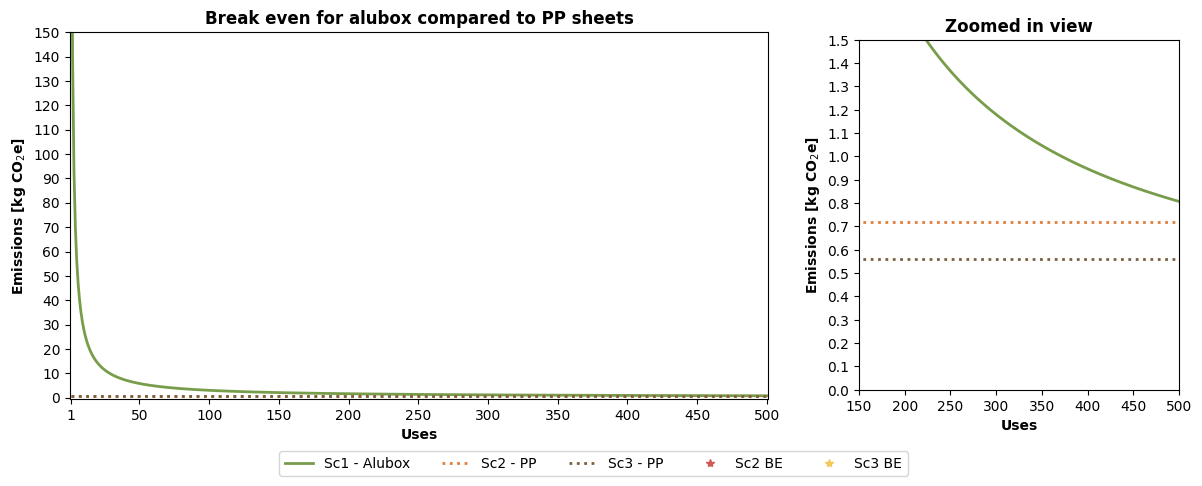

In [385]:


fig, ax = plt.subplots(figsize=(8, 5))

plot_handles = []  # List to store plot handles
plot_labels = []  # List to store labels

# Plotting the dashed line
ax.plot(use, BE_value, color=colors[0],  label='Sc1 - Alubox', linewidth=2)

ax.plot(use, pp2, color=colors[1],linestyle='dotted', label='Sc2 - PP', linewidth=2)
ax.plot(use, pp3, color=colors[2],linestyle='dotted', label='Sc3 - PP', linewidth=2)
ax.plot(BE_pp2, BE_value[BE_pp2], '*',linewidth=1, color=colors[4],label = 'Sc2 BE')
ax.plot(BE_pp3, BE_value[BE_pp3],'*',linewidth=1, color=colors[5], label = 'Sc3 BE')
# # Plotting the columns
# for i in range(1, len(use)):
#     line, = ax.plot(data[use], data[df_col[i]], color=colors[i],linestyle='dotted', label=df_col[i], linewidth=2)
#     plot_handles.append(line)
#     plot_labels.append(df_col[i])

#     print(df_col[i])



# Axis labels and title
ax.set_ylabel('Emissions [kg CO$_2$e]', weight='bold')
ax.set_xlabel('Uses', weight='bold')



# Set x-axis and y-axis ticks
ax.set_xticks(range_list)

ax.set_yticks(np.arange(0, 151, step=10))

# # Axis limits
ax.set_xlim(0, 501)
ax.set_ylim(-.5, 150)
ax.set_title('Break even for alubox compared to PP sheets', weight='bold')

# # Legend
# ax.legend(plot_handles, df_col, bbox_to_anchor=(0.1, -0.21, .8, 0.2), loc="lower left",
#           mode="expand", borderaxespad=0, ncol=3)
plt.legend(bbox_to_anchor=(0.3, -0.21, .9, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=5)

# Inset axis for zoomed-in view
ax_inset = fig.add_axes([1.08, 0.21, 0.4, 0.7])  # Adjust position and size as needed

ax_inset.plot(use, BE_value, color=colors[0],  label='Alubox', linewidth=2)
# Axis labels and title
ax_inset.set_ylabel('Emissions [kg CO$_2$e]', weight='bold')
ax_inset.set_xlabel('Uses', weight='bold')
ax_inset.plot(use, pp2, color=colors[1],linestyle='dotted', label='PP2', linewidth=2)
ax_inset.plot(use, pp3, color=colors[2],linestyle='dotted', label='PP3', linewidth=2)
ax_inset.plot(BE_pp2, BE_value[BE_pp2], '*',linewidth=1, color=colors[4],label = 'PP2 BE')
ax_inset.plot(BE_pp3, BE_value[BE_pp3],'*',linewidth=1, color=colors[5], label = 'PP3 BE')


ax_inset.set_xlim(150, 500)
ax_inset.set_ylim(0, 1.5)
ax_inset.set_xticks(np.arange(150, 501, step=50))
ax_inset.set_yticks(np.arange(0, 1.51, step=0.1))
ax_inset.set_title('Zoomed in view', weight='bold')

# Save the plot
plt.tight_layout()
#plt.savefig(os.path.join(save_dir, 'break_even_total_RS.jpg'), bbox_inches='tight')
plt.show()


In [386]:
df_cols = df.columns
df_idx = df.index
print(df_cols)
print(df_idx)



Index([('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)')], dtype='object')
Index(['disinfection', 'energy mix', 'autoclave', 'alubox raw materials',
       'alubox EoL mixed sorting', 'alubox', 'alubox production',
       'alubox EoL melting', 'Handwash', 'transport Alu'],
      dtype='object')


In [387]:
color_dict = {}
for idx in df_idx:
    if idx == 'alubox':
        color_dict[idx] = colors[0]
    elif idx in df_idx:
        color_dict[idx] = colors[1]
    else:
        color_dict[idx] = colors[2]

color_dict

{'disinfection': '#E07E3C',
 'energy mix': '#E07E3C',
 'autoclave': '#E07E3C',
 'alubox raw materials': '#E07E3C',
 'alubox EoL mixed sorting': '#E07E3C',
 'alubox': '#789D4A',
 'alubox production': '#E07E3C',
 'alubox EoL melting': '#E07E3C',
 'Handwash': '#E07E3C',
 'transport Alu': '#E07E3C'}

In [388]:
a = df[df_cols].values[0][0]


In [389]:
links_base = [''] * (len(df_idx))
idx_del = 0
for i in range(len(df_idx)):
    if df[df_cols].values[i][0] < 0:
        links_base[i] = {"source": 'alubox', "target": df_idx[i], "value": -df[df_cols].values[i][0]}
    else:
        links_base[i] = {"source":  df_idx[i], "target": 'alubox', "value": df[df_cols].values[i][0]}

    if links_base[i]["source"] == 'alubox' and links_base[i]["target"] == 'alubox':
        idx_del = i
       
links_base.pop(idx_del)
print(len(links_base))


9


In [390]:
nodes_base = [''] * len(df_idx)

for i in range(len(nodes_base)):
    nodes_base[i] = df_idx[i]


In [391]:
links_base

[{'source': 'disinfection', 'target': 'alubox', 'value': 0.08963416521869136},
 {'source': 'energy mix', 'target': 'alubox', 'value': 0.0},
 {'source': 'autoclave', 'target': 'alubox', 'value': 0.13321320192508945},
 {'source': 'alubox raw materials',
  'target': 'alubox',
  'value': 0.15424392822806834},
 {'source': 'alubox',
  'target': 'alubox EoL mixed sorting',
  'value': 0.0031809502666462035},
 {'source': 'alubox production',
  'target': 'alubox',
  'value': 0.022156774026373678},
 {'source': 'alubox',
  'target': 'alubox EoL melting',
  'value': 0.13106909346999135},
 {'source': 'Handwash', 'target': 'alubox', 'value': 0.023379348720742505},
 {'source': 'transport Alu',
  'target': 'alubox',
  'value': 0.002132467202204817}]

In [394]:
# Create a Sankey diagram
fig = go.Figure()

# Calculate the scale factor for link thickness and node size
max_value = 175.14  # max(link['value'] for link in links)
scale_factor = 1  # You can adjust this factor to control the scaling

# Calculate total outflow for each node and round to 2 decimals
outflow_totals = {node: round(sum(link['value'] for link in links_base if link['source'] == node), 2) for node in df_idx}

# Calculate total inflow for each node and round to 2 decimals
inflow_totals = {node: round(sum(link['value'] for link in links_base if link['target'] == node), 2) for node in df_idx}

# Determine if a node has only incoming flows
incoming_only = {node: inflow_totals[node] > 0 and outflow_totals[node] == 0 for node in df_idx}

# Calculate y-coordinates for nodes based on total outflow or inflow
node_y_coordinates = [sum(inflow_totals[node] if incoming_only[node] else outflow_totals[node] for node in df_idx[:i]) for i in range(len(df_idx))]

# Add links
fig.add_trace(go.Sankey(
    node=dict(
        pad=500,
        thickness=20,
        line=dict(width=[link['value'] / max_value * scale_factor for link in links_base]),
        label=[f"{node}<br>{inflow_totals[node] if incoming_only[node] else outflow_totals[node]}%" for node in df_idx],
        #color=[node_colors.get(node, 'rgba(255, 255, 255, {})') for node in df_idx],
    ),
    link=dict(
        source=[nodes_base.index(link['source']) for link in links_base],
        target=[nodes_base.index(link['target']) for link in links_base],
        value=[link['value'] for link in links_base],
        #color=[node_colors_links.get(link['source'], 'rgba(255, 255, 255, {})') for link in links_base],  # Use source node color for links
        line=dict(width=[link['value'] / max_value * scale_factor for link in links_base]),
    ),
    arrangement="perpendicular",
    domain=dict(x=[0, 1], y=[0, 1]),
))



# Show the figure
fig.show()
#fig.write_image("Sankey_Basecase.jpg")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed